Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')


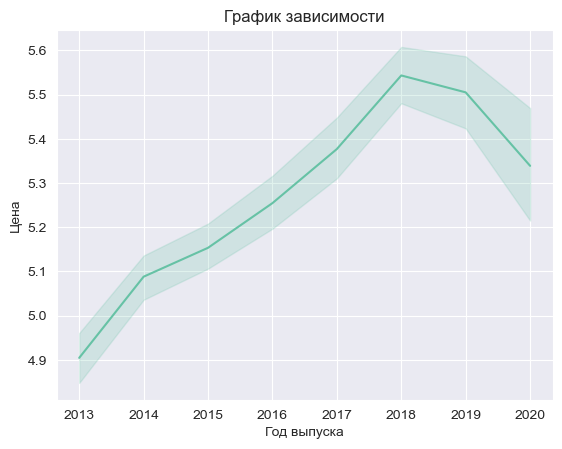

Среднеквадратическая ошибка = 0.42165794944870527
Корень текущей среднеквадратичной ошибки (RMSE) = 0.6493519457495336


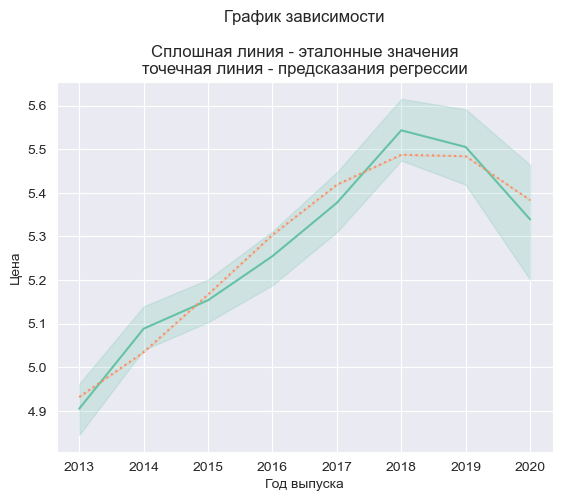

[ 3.46402885e+07 -5.15696966e+04  2.55908842e+01 -4.23305178e-03]


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import math

# Загрузка данных
PATH = "used_device_data.csv"
DATASET_SIZE = 3000
dataset = pd.read_csv(PATH)
dataset = dataset.head(DATASET_SIZE)

# Проверка названий столбцов
print(dataset.columns)

# Обновление списка important_columns в соответствии с фактическими названиями столбцов
important_columns = ["release_year", "normalized_new_price"]
dataset = dataset[important_columns].copy()

# Убедитесь, что столбцы 'normalized_new_price' и 'release_year' существуют в вашем датасете
my_y = 'normalized_new_price'
my_x = 'release_year'

# Обработка данных
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = dataset[column].str.split().str.join("")
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

# Визуализация данных
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
    x=dataset[my_x],
    y=dataset[my_y],
)
plt.title('График зависимости')
plt.xlabel('Год выпуска')
plt.ylabel('Цена')
plt.show()

# Модель полиномиальной регрессии
x = np.array(dataset[my_x]).reshape(-1, 1)
y = np.array(dataset[my_y]).reshape(-1, 1)

DEGREES = 3
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mse = mean_squared_error(y, predictions)
print(f'Среднеквадратическая ошибка = {mse}')
print(f'Корень текущей среднеквадратичной ошибки (RMSE) = {math.sqrt(mse)}')

# График эталонных и предсказанных значений
sns.lineplot(
    x=dataset[my_x],
    y=dataset[my_y],
    linestyle="solid"
)
sns.lineplot(
    x=dataset[my_x],
    y=predictions.reshape(-1),
    linestyle="dotted"
)
plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Год выпуска')
plt.ylabel('Цена')
plt.show()

# Коэффициенты уравнения
x_parameters = np.append(
    regression.named_steps['linearregression'].intercept_,
    regression.named_steps['linearregression'].coef_[0][1:]
)
print(x_parameters)
